 I very much need to change the path to all of these files I am going to be opening. 

In [1]:
# import plastid
# data structure for mapping read alignments to genomic positions
from plastid import BAMGenomeArray, VariableFivePrimeMapFactory, \
                        GTF2_TranscriptAssembler, Transcript
import numpy as np

In [28]:
# Define the names of the top 10 genes with the greatest difference 
# between control and treatment. 
PATH = "/Users/keeganflanagan/Desktop/Khanh_position/genomes_and_samples/Mouse/"
top_10 = ["Map1a","Atp5e","Fmr1","Fat3","Prr12","Srrm2","Hectd4","Tmsb4x","Ndufa1","Lrp1"]

In [9]:
# load the transcript annotations from the BED file.
# BED_Reader returns an iterator, so here we convert it to a list.
transcripts = list(GTF2_TranscriptAssembler(open(PATH + "mm10.refGene.gtf"),return_type=Transcript))


In [12]:
maprule = VariableFivePrimeMapFactory.from_file(open(PATH + "mm10_1_riboprofile_p_offsets.txt"))

# load ribosome profiling data
alignments = BAMGenomeArray(PATH + "Fmr1_RPF_1_Aligned.sortedByCoord.out.bam")

# set P-site mapping as 14 nucleotides from 5' end
alignments.set_mapping(maprule)

In [13]:
# create a list to hold the vectors
count_vectors = []

# get counts for each transcript
for transcript in transcripts:
    count_vectors.append(transcript.get_counts(alignments))

In [30]:
# Create a function that finds the proteins I need. 
def find_transcript(prot,transcripts = transcripts, count_vectors = count_vectors):
    '''
    A function that takes the name of a gene as input and finds 
    the corresponding transcript from a transcript list. 
    
    returns both the transcript in question and the vector of counts for that transcript.
    '''
    for i in transcripts:
        if i.attr['gene_name'] == prot:
            my_transcript = i
            my_vector = count_vectors[transcripts.index(i)]
                
    return my_transcript, my_vector

In [50]:
top_10_transcripts = []
top_10_vectors = [] 

for gene in top_10:
    top_10_transcripts.append(find_transcript(gene)[0])
    top_10_vectors.append(find_transcript(gene)[1])
    

In [39]:
#Get the transcript and vector for the gene of interest
my_transcript, my_vector = find_transcript('Fmr1')

In [40]:
# lengths should match
my_transcript.length, len(my_vector)

(4303, 4303)

In [41]:
# get total counts over entire array
my_vector.sum()

441.0

In [62]:
top_10_transcripts[1].attr["gene_name"]

'Atp5e'

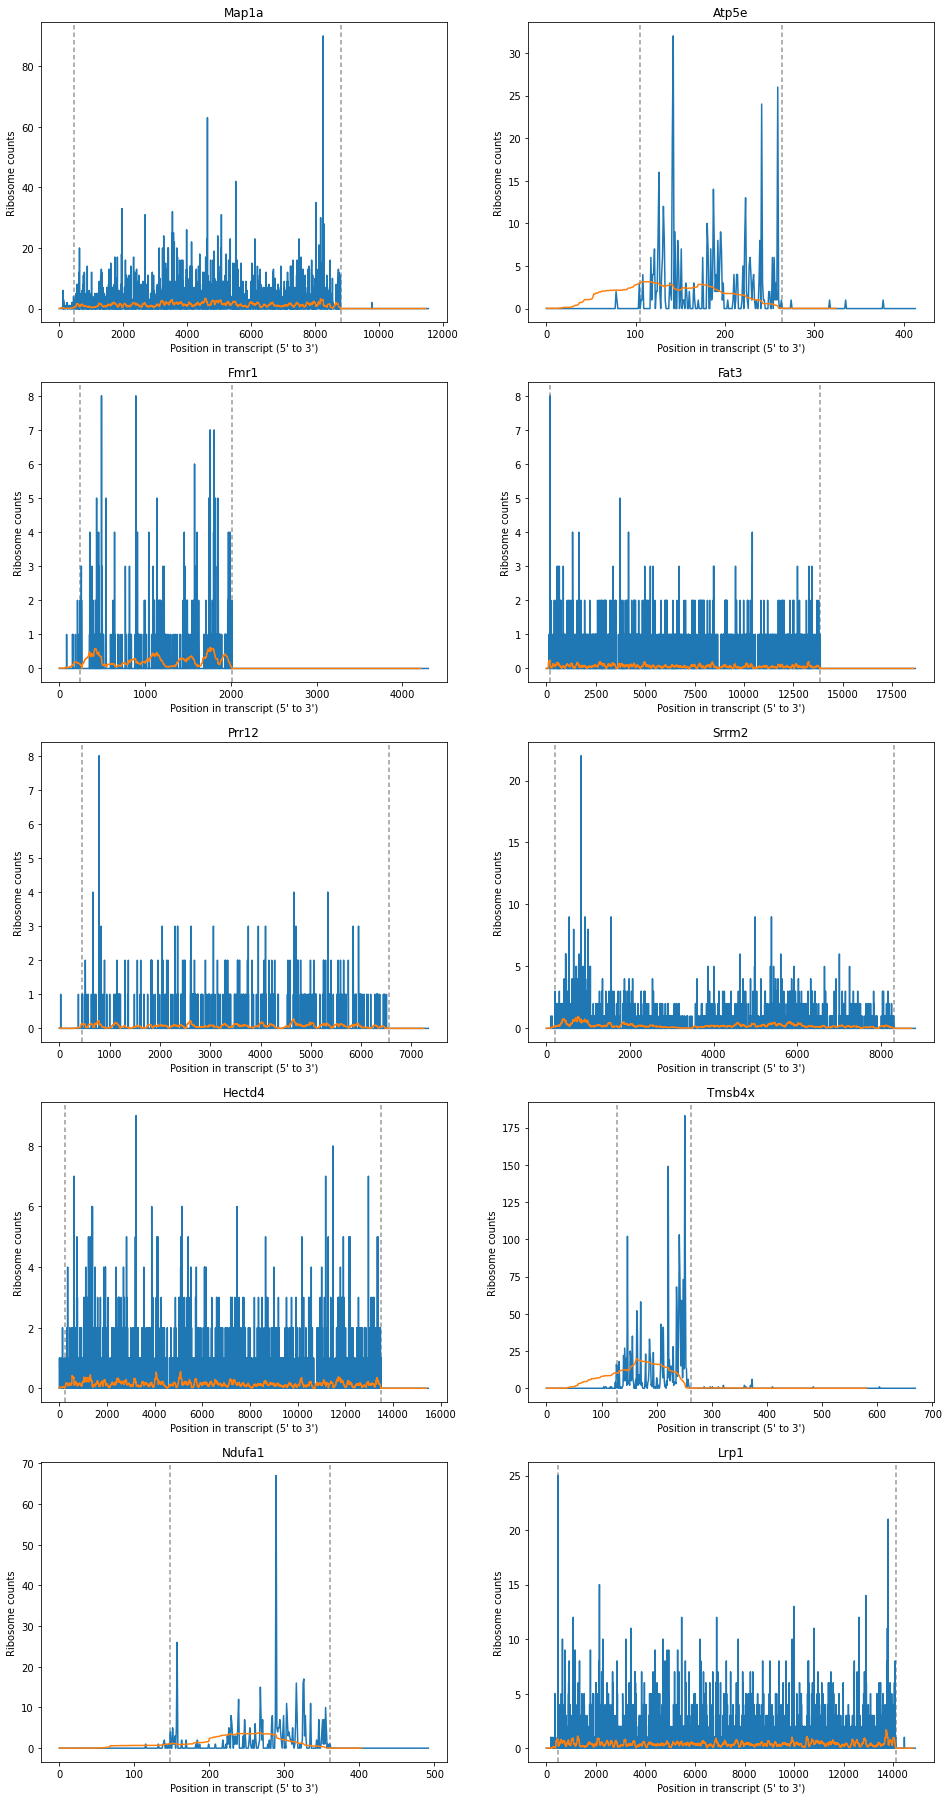

In [64]:
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
import math

fig,ax=plt.subplots(math.ceil(len(top_10)/2),2,figsize=(16,32))

for axi, veci, trai in zip(ax.flatten(), top_10_vectors, top_10_transcripts):
    # 30-codon sliding window average
    window = numpy.ones(90).astype(float)/90.0
    sliding_window_avg = numpy.convolve(veci,window,mode="valid")

    # plot

    axi.plot(veci,label="%s counts" % trai.get_name())
    axi.plot(sliding_window_avg,label="30 codon average")
    axi.set_xlabel("Position in transcript (5' to 3')")
    axi.set_ylabel("Ribosome counts")
    axi.set_title(trai.attr["gene_name"])

    # add outlines at start & stop codons
    axi.axvline(trai.cds_start,color="#999999",dashes=[3,2],zorder=-1)
    axi.axvline(trai.cds_end,color="#999999",dashes=[3,2],zorder=-1)

Hmmmm, I definitely need to pick genes that have a decent number of reads in order to see anything. 